In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import os
import particles

In [4]:
%matplotlib inline

In [5]:
# sns.seedst(style="ticks")
plt.rcParams['figure.figsize'] = (20, 16)
plt.rcParams['xtick.labelsize'] = 'x-large'
plt.rcParams['ytick.labelsize'] = 'x-large'

In [6]:
nano = 10**-9

In [7]:
def stokes_einstein(dp, T=298):
    kB = 1.38064852*10**-23
    d = (kB*T)/(3*np.pi*0.0001*dp)
    return d

# X-direction

In [8]:
data_direction_2x = '/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/data/m2x/'
data_direction_1x = '/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/data/m1x/'

In [9]:
files_2x = [data_direction_2x+f for f in os.listdir(data_direction_1x)]
files_1x = [data_direction_1x+f for f in os.listdir(data_direction_1x)]

In [10]:
diameters = [d.split('/')[-1].split('_')[1].split('.')[0] for d in files_1x]
diameters

['1000', '1250', '1500', '1750', '2000', '250', '500', '750']

In [11]:
sigma_x2 = []
for f in range(len(files_2x)):
    m2x = pd.read_csv(files_2x[f], index_col=0).mean(axis=1)
    m1x = pd.read_csv(files_1x[f], index_col=0).mean(axis=1)
    sigma_x2.append(m2x-m1x**2)

In [12]:
time = sigma_x2[0].index
df = pd.DataFrame(np.array(sigma_x2).T, columns=diameters, index=time)
da = df[[d for d in diameters if '500'!=d]]
da = da.reindex_axis(da.columns.astype(int).sort_values().astype(str), axis=1)

0.821601567348
0.8264805591
0.823771386816
0.853938307048
0.789147478438
0.945287356554
0.927851765082


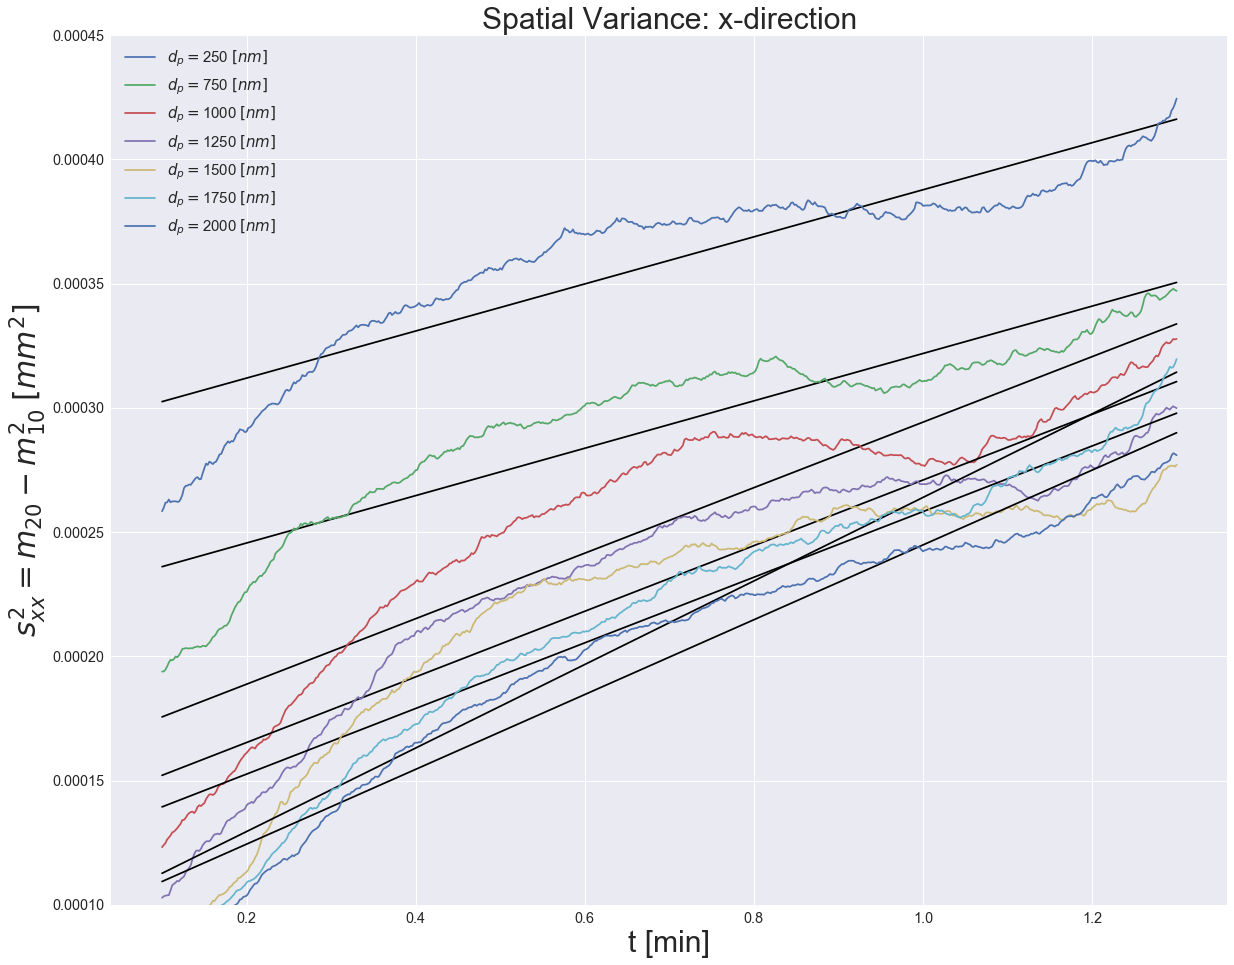

In [13]:
fig, ax = plt.subplots()
data = da.loc[0.1:1.3]
fitting = []
for i in da.columns:
    y = data[i]
    x = data.index
    fit = np.polyfit(x, y, deg=1)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x=x, y=y)
    print(r_value**2)
    ax.plot(x, slope * x +intercept, color='black')
    ax.plot(x,y,label=r'$d_p=$'+i+r' $[nm]$')
    fitting.append([slope, intercept])
plt.legend(fontsize=15)
ymin=0.0001
ymax=0.00045
xmin=0.0
xmax=1.0
plt.ylim(ymin,ymax)
plt.xlabel('t [min]', fontsize=30)
plt.ylabel(r'$s^{2}_{xx}=m_{20}-m_{10}^2$ $[mm^2]$', fontsize=30)
plt.title('Spatial Variance: x-direction', fontsize=30)

In [59]:
fig.savefig('/Users/georgepamfilis/Dropbox/THESIS/Διπλωματική/V1/sxx2.png')

In [60]:
params = np.array(fitting)
params[:,0] = params[:,0]/2
params

array([[  4.73608051e-05,   2.93010355e-04],
       [  4.76566592e-05,   2.26536035e-04],
       [  6.58953700e-05,   1.62425220e-04],
       [  6.60144512e-05,   1.38902885e-04],
       [  6.60099326e-05,   1.26200148e-04],
       [  8.40253211e-05,   9.58728285e-05],
       [  7.52447459e-05,   9.43215169e-05]])

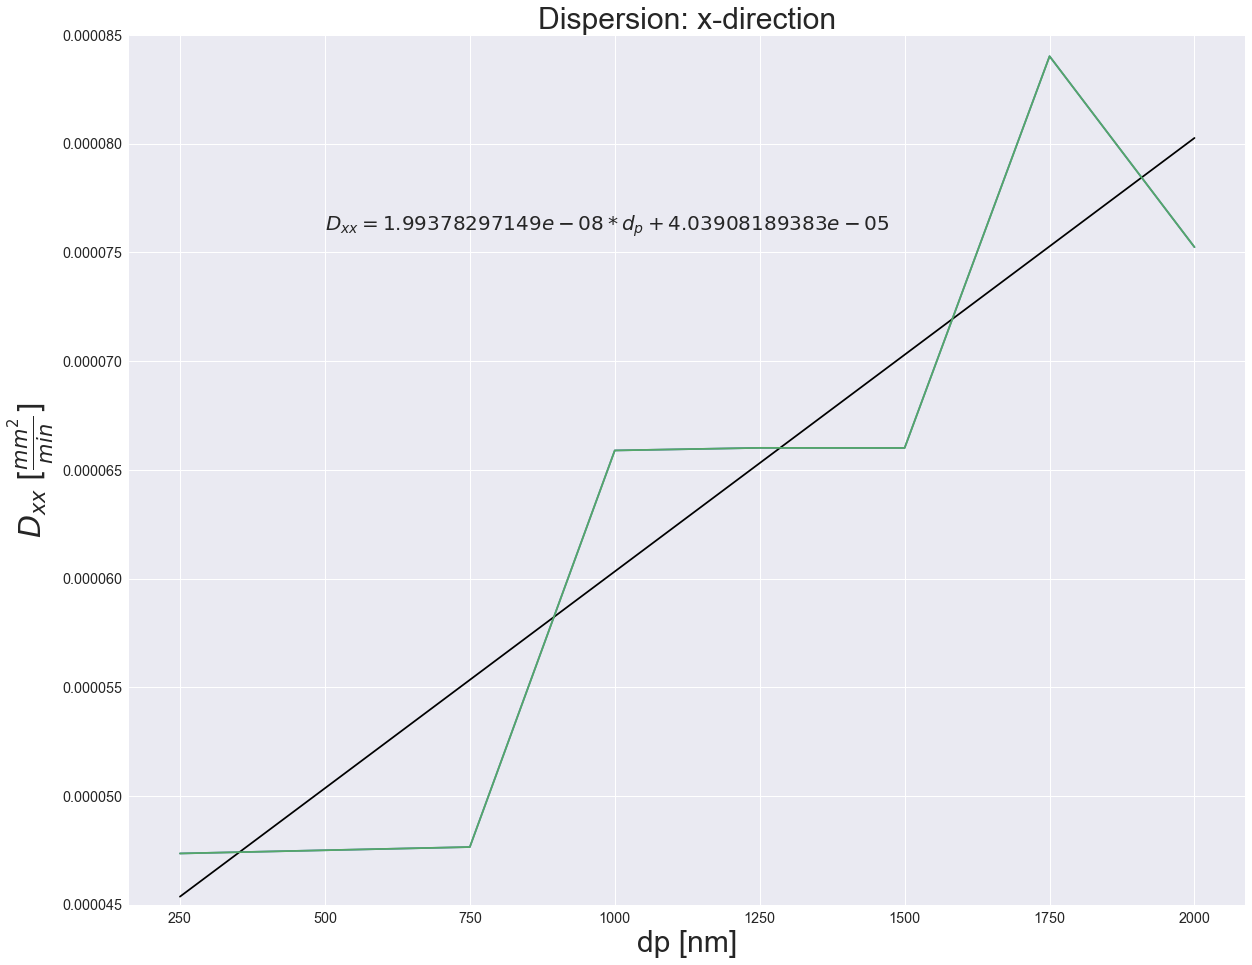

In [67]:
fig, ax = plt.subplots()
x = data.columns.astype(int)
y = params[:,0]
plt.plot(x, y)
slope, intercept, r_value, p_value, std_err = stats.linregress(x=x,y=y)
plt.plot(x, slope * x +intercept, color='black')
plt.plot(x,y)
plt.legend(fontsize=15)
ymin=0.000045
ymax=0.000085
plt.ylim(ymin,ymax)
plt.ylabel(r'$D_{xx}$ $[\frac{mm^2}{min}]$', fontsize=30)
plt.xlabel('dp [nm]', fontsize=30)
plt.title('Dispersion: x-direction', fontsize=30)
plt.text(500, 0.000076, r'$D_{xx}$'+'$={0}*d_p+{1}$'.format(slope,intercept), fontsize=20)

In [68]:
fig.savefig('/Users/georgepamfilis/Dropbox/THESIS/Διπλωματική/V1/dxx.png')

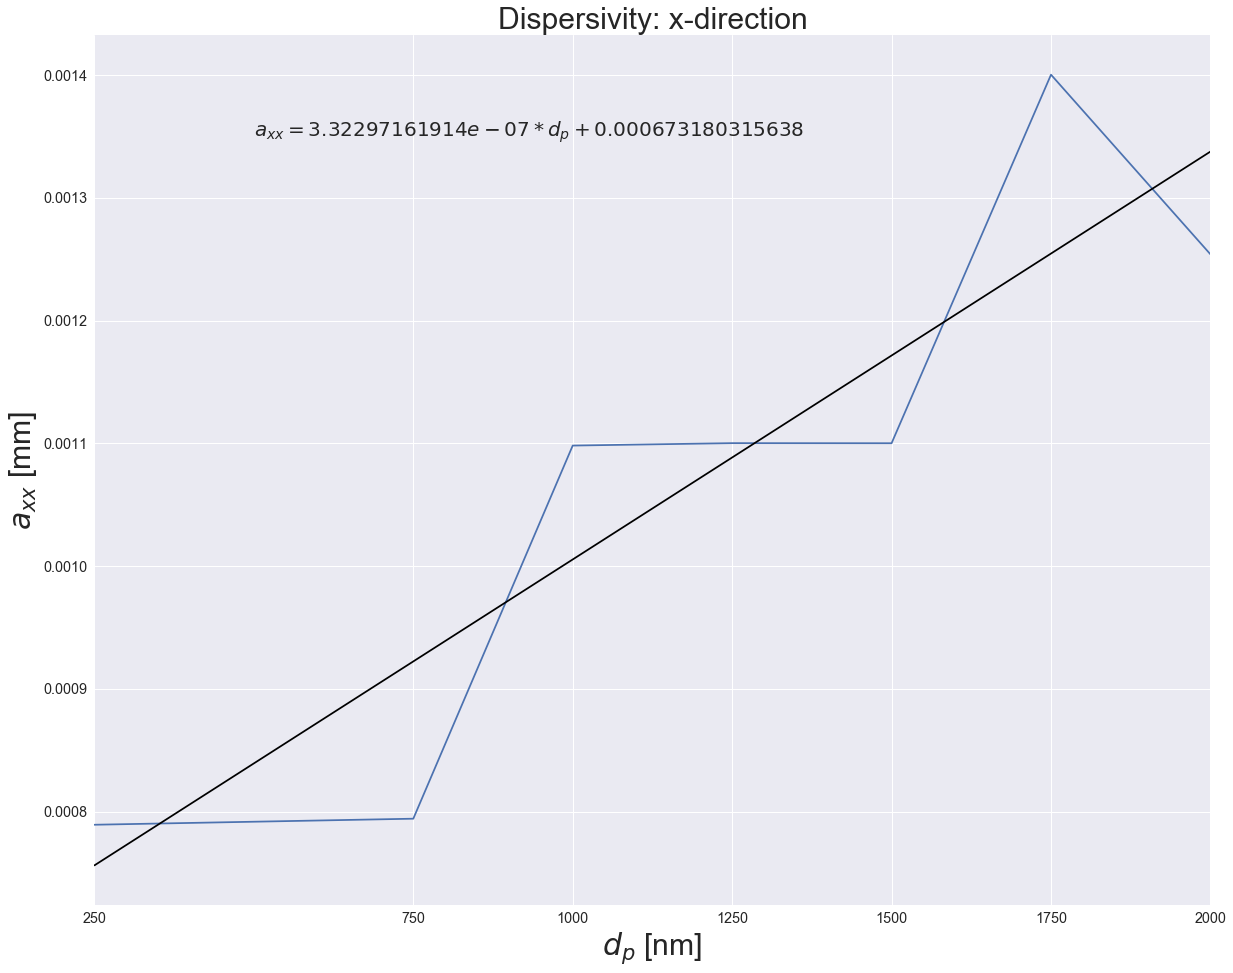

In [70]:
diff = params[:,0] - stokes_einstein(x)

v_av_meters_second =  0.000001 # m/s 
n=1
v_av_millimeters_minite = v_av_meters_second*60*1000
a_x = diff/(v_av_millimeters_minite)**n

fig, ax = plt.subplots()
sns.tsplot(data=a_x,time=x, err_style="ci_bars")
fit = np.polyfit(x, a_x, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='black')
plt.text(500, 0.00135, r'$a_{xx}=$'+r'${0}*d_p+{1}$'.format(fit[0],fit[1]), fontsize=20)
plt.xlabel(r'$d_p$ [nm]', fontsize=30)
plt.ylabel(r'$a_{xx}$ [mm]', fontsize=30)
plt.xticks(x);
plt.title('Dispersivity: x-direction', fontsize=30)

In [71]:
fig.savefig('/Users/georgepamfilis/Dropbox/THESIS/Διπλωματική/V1/axx.png')

In [14]:
data_direction_2y = '/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/data/m2y/'
data_direction_1y = '/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/data/m1y/'


files_2y = [data_direction_2y+f for f in os.listdir(data_direction_1y)]
files_1y = [data_direction_1y+f for f in os.listdir(data_direction_1y)]


diameters = [d.split('/')[-1].split('_')[1].split('.')[0] for d in files_1y]
diameters

sigma_y2 = []
for f in range(len(files_2y)):
    m2y = pd.read_csv(files_2y[f], index_col=0).mean(axis=1)
    m1y = pd.read_csv(files_1y[f], index_col=0).mean(axis=1)
    sigma_y2.append(m2y-m1y**2)

In [15]:
time = sigma_y2[0].index
df = pd.DataFrame(np.array(sigma_y2).T, columns=diameters, index=time)
da = df[[d for d in diameters if '500' !=d]]
da = da.reindex_axis(da.columns.astype(int).sort_values().astype(str), axis=1)

0.612561807482
0.741648148724
0.761969701882
0.78495691673
0.796377709596
0.952186210826
0.913371972905


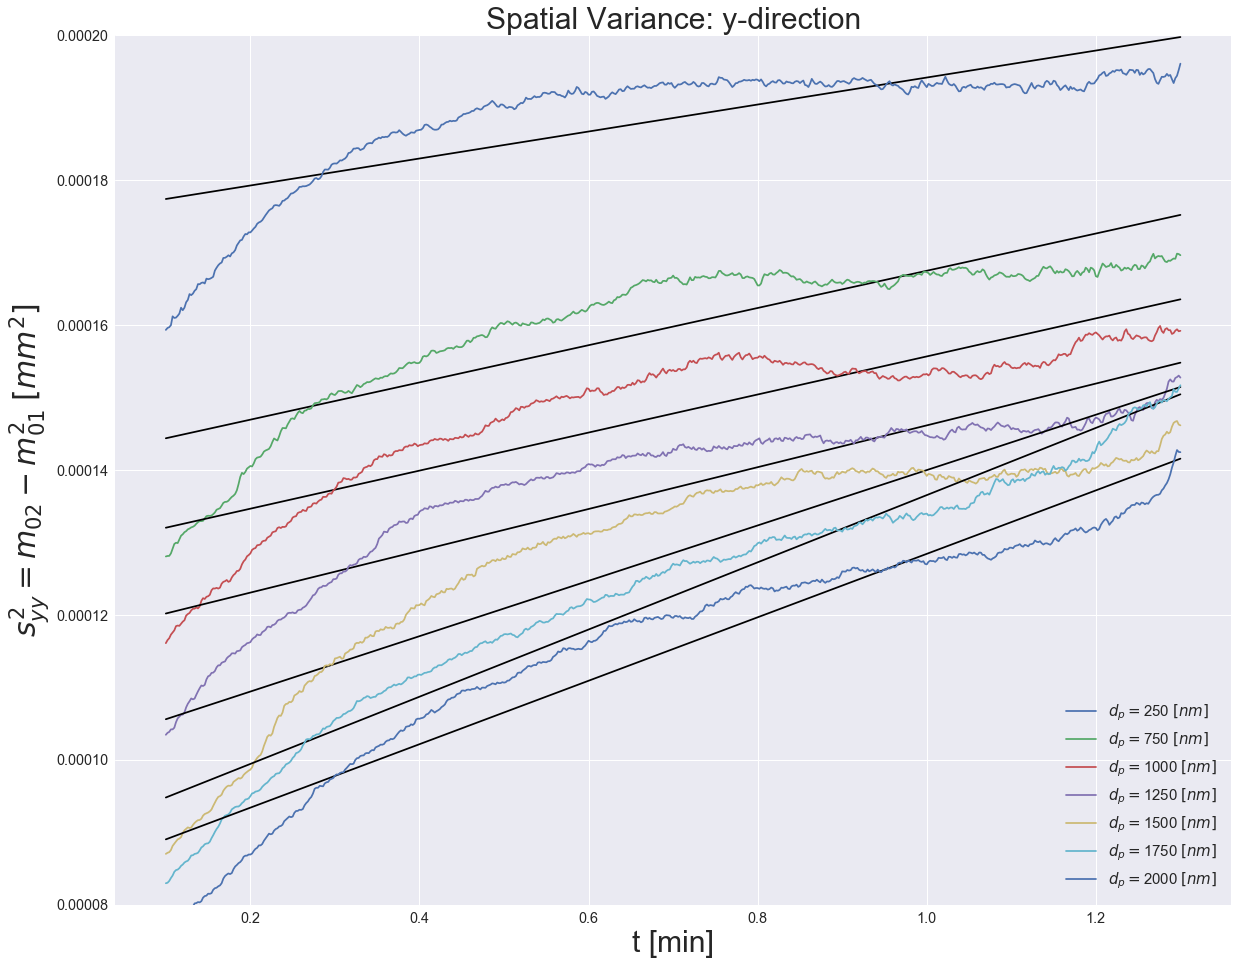

In [16]:
fig, ax = plt.subplots()
data = da.loc[0.1:1.3]
fitting = []
for i in da.columns:#range(len(diameters)):
    y = data[i]
    x = data.index
    fit = np.polyfit(x, y, deg=1)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x=x, y=y)
    print(r_value**2)
    ax.plot(x, slope * x +intercept, color='black')
    ax.plot(x,y,label=r'$d_p=$'+i+r' $[nm]$')
    fitting.append([slope, intercept])
plt.legend(fontsize=15)
ymin=0.00008
ymax=.0002
xmin=0.0
xmax=1.0
plt.ylim(ymin,ymax)
plt.xlabel('t [min]', fontsize=30)
plt.ylabel(r'$s^{2}_{yy}=m_{02}-m_{01}^2$ $[mm^2]$', fontsize=30)
plt.title('Spatial Variance: y-direction', fontsize=30)

In [17]:
fig.savefig('/Users/georgepamfilis/Dropbox/THESIS/Διπλωματική/V1/syy2.png')

In [18]:
params = np.array(fitting)
params[:,0] = params[:,0]/2
params

array([[  9.30963890e-06,   1.75517950e-04],
       [  1.28404002e-05,   1.41798786e-04],
       [  1.31290772e-05,   1.29400710e-04],
       [  1.44192914e-05,   1.17306420e-04],
       [  1.90969012e-05,   1.01783950e-04],
       [  2.31779840e-05,   9.01679556e-05],
       [  2.18854053e-05,   8.46503908e-05]])

/Users/georgepamfilis/PycharmProjects/compy/venv/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


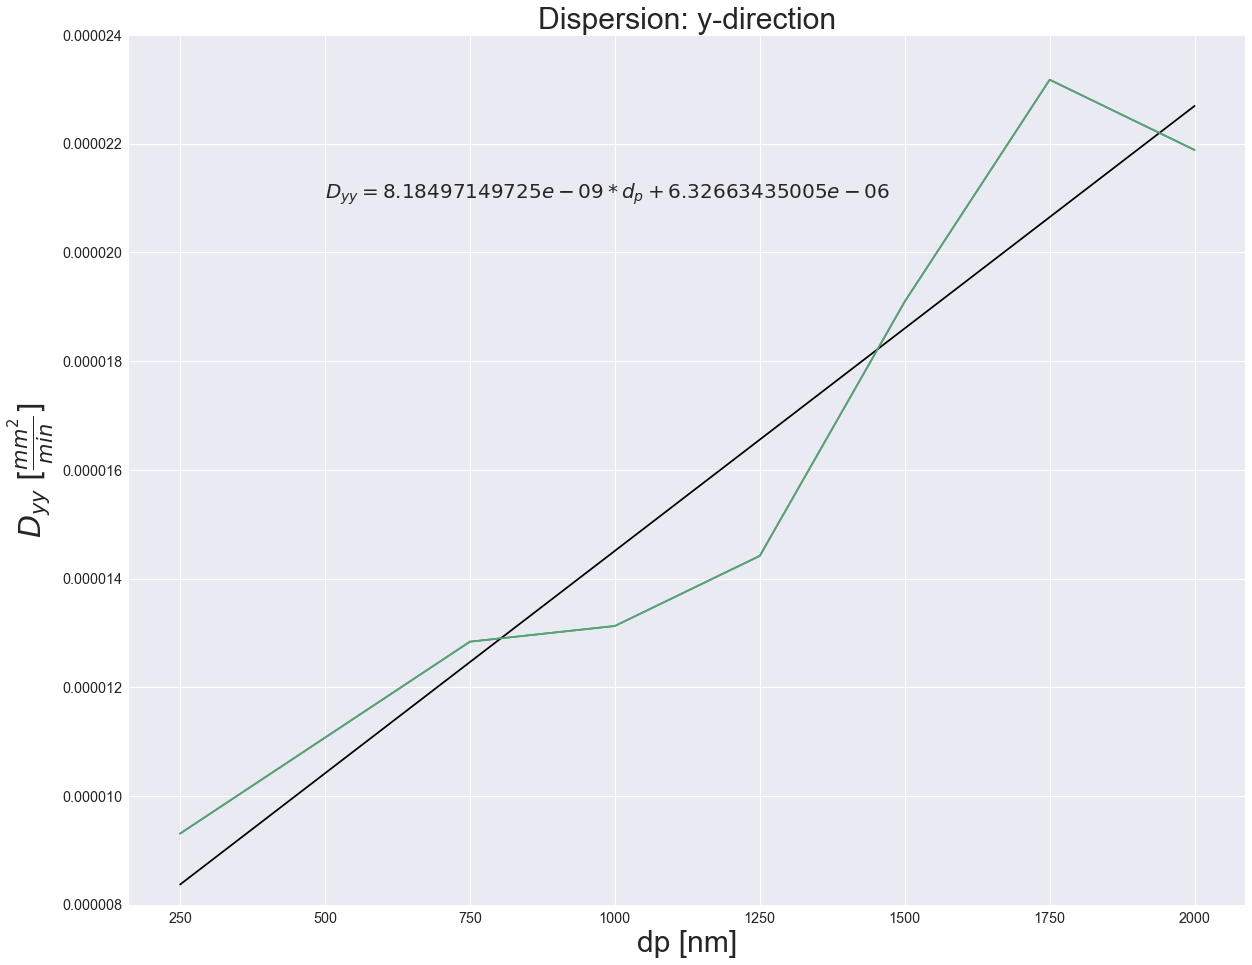

In [19]:
fig, ax = plt.subplots()

x = data.columns.astype(int)
y = params[:,0]
plt.plot(x, y)
slope, intercept, r_value, p_value, std_err = stats.linregress(x=x,y=y)
plt.plot(x, slope * x +intercept, color='black')
plt.plot(x,y)
plt.legend(fontsize=15)
ymin=0.000008
ymax=0.000024
plt.ylim(ymin,ymax)
plt.ylabel(r'$D_{yy}$ $[\frac{mm^2}{min}]$', fontsize=30)
plt.xlabel('dp [nm]', fontsize=30)
plt.title('Dispersion: y-direction', fontsize=30)
plt.text(500, 0.000021, r'$D_{yy}$'+'$={0}*d_p+{1}$'.format(slope,intercept), fontsize=20)

In [20]:
fig.savefig('/Users/georgepamfilis/Dropbox/THESIS/Διπλωματική/V1/dyy.png')

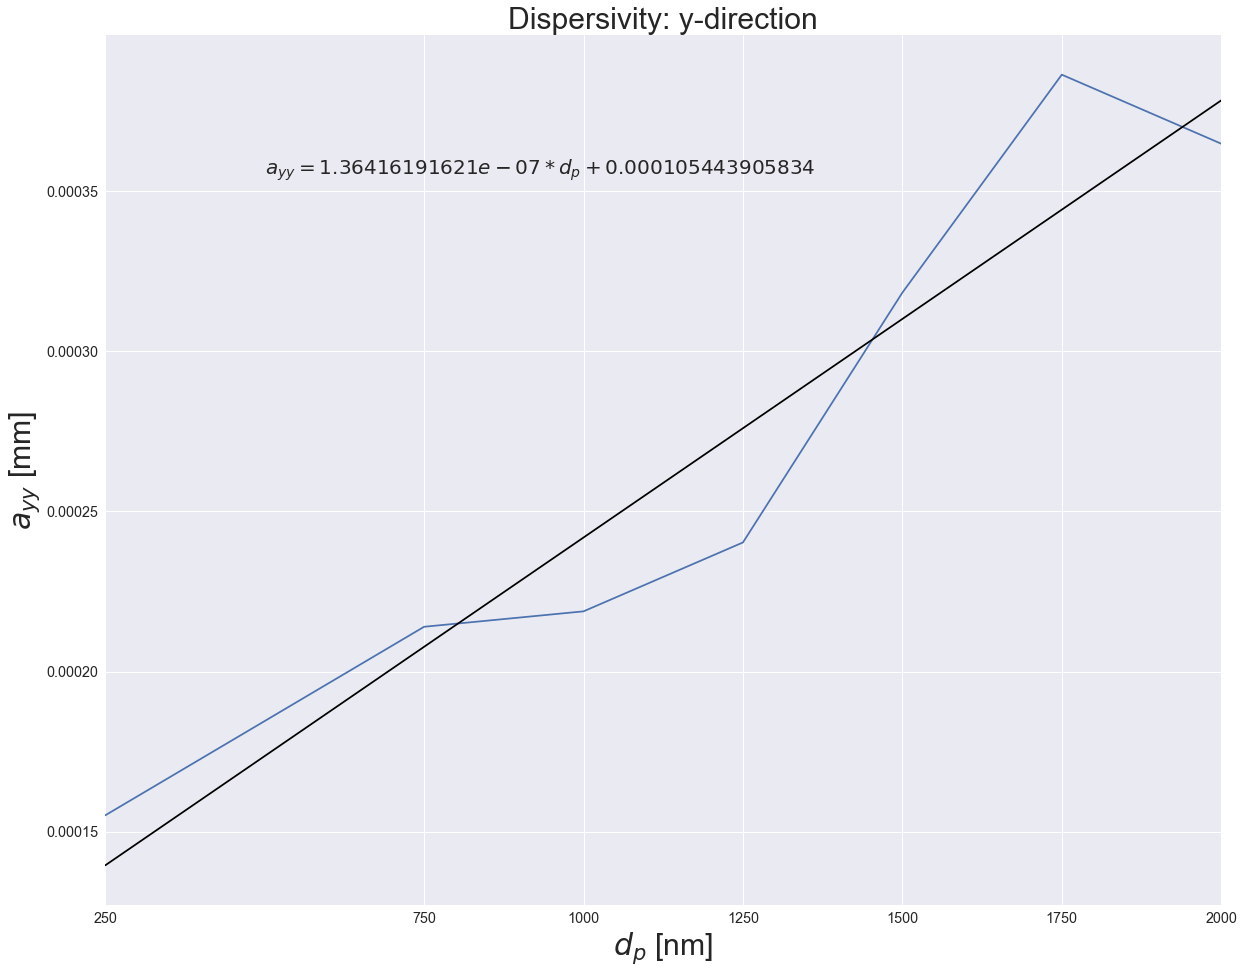

In [22]:
diff = params[:,0] - stokes_einstein(x)

v_av_meters_second =  0.000001 # m/s 
n=1
v_av_millimeters_minite = v_av_meters_second*60*1000
a_y = diff/(v_av_millimeters_minite)**n

fig, ax = plt.subplots()
sns.tsplot(data=a_y,time=x, err_style="ci_bars")
fit = np.polyfit(x, a_y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='black')
plt.text(500, 0.000355, r'$a_{yy}=$'+r'${0}*d_p+{1}$'.format(fit[0],fit[1]), fontsize=20)
plt.xlabel(r'$d_p$ [nm]', fontsize=30)
plt.ylabel(r'$a_{yy}$ [mm]', fontsize=30)
plt.xticks(x);
plt.title('Dispersivity: y-direction', fontsize=30)

In [23]:
fig.savefig('/Users/georgepamfilis/Dropbox/THESIS/Διπλωματική/V1/ayy.png')

# COMPUTE DISPERSIONS